# Car price prediction 
using spark framework in python (pyspark)

In [ ]:
# !pip install pyspark

In [1162]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan
import seaborn

start spark session

In [1163]:
if __name__ == "__main__":
    spark = SparkSession.builder.appName("Car_Price").getOrCreate()

load dataset

In [1164]:
dataset = spark.read.csv('/home/lucifer/Downloads/archive (2)/CarPrice_Assignment.csv',header= True, inferSchema=True)

analysis

In [1165]:
dataset.columns

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [1166]:
dataset1 = dataset

In [1167]:
dataset.show(5)

+------+---------+--------------------+--------+----------+----------+-----------+----------+--------------+---------+---------+--------+---------+----------+----------+--------------+----------+----------+---------+------+----------------+----------+-------+-------+----------+-------+
|car_ID|symboling|             CarName|fueltype|aspiration|doornumber|    carbody|drivewheel|enginelocation|wheelbase|carlength|carwidth|carheight|curbweight|enginetype|cylindernumber|enginesize|fuelsystem|boreratio|stroke|compressionratio|horsepower|peakrpm|citympg|highwaympg|  price|
+------+---------+--------------------+--------+----------+----------+-----------+----------+--------------+---------+---------+--------+---------+----------+----------+--------------+----------+----------+---------+------+----------------+----------+-------+-------+----------+-------+
|     1|        3|  alfa-romero giulia|     gas|       std|       two|convertible|       rwd|         front|     88.6|    168.8|    64.1|  

In [1168]:
dataset.summary().show()

+-------+-----------------+------------------+------------+--------+----------+----------+-----------+----------+--------------+------------------+------------------+-----------------+------------------+------------------+----------+--------------+------------------+----------+-------------------+-------------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+
|summary|           car_ID|         symboling|     CarName|fueltype|aspiration|doornumber|    carbody|drivewheel|enginelocation|         wheelbase|         carlength|         carwidth|         carheight|        curbweight|enginetype|cylindernumber|        enginesize|fuelsystem|          boreratio|             stroke|  compressionratio|       horsepower|          peakrpm|          citympg|       highwaympg|             price|
+-------+-----------------+------------------+------------+--------+----------+----------+-----------+----------+--------------+--------------

In [1169]:
dataset.printSchema()

root
 |-- car_ID: integer (nullable = true)
 |-- symboling: integer (nullable = true)
 |-- CarName: string (nullable = true)
 |-- fueltype: string (nullable = true)
 |-- aspiration: string (nullable = true)
 |-- doornumber: string (nullable = true)
 |-- carbody: string (nullable = true)
 |-- drivewheel: string (nullable = true)
 |-- enginelocation: string (nullable = true)
 |-- wheelbase: double (nullable = true)
 |-- carlength: double (nullable = true)
 |-- carwidth: double (nullable = true)
 |-- carheight: double (nullable = true)
 |-- curbweight: integer (nullable = true)
 |-- enginetype: string (nullable = true)
 |-- cylindernumber: string (nullable = true)
 |-- enginesize: integer (nullable = true)
 |-- fuelsystem: string (nullable = true)
 |-- boreratio: double (nullable = true)
 |-- stroke: double (nullable = true)
 |-- compressionratio: double (nullable = true)
 |-- horsepower: integer (nullable = true)
 |-- peakrpm: integer (nullable = true)
 |-- citympg: integer (nullable = t

Null values

In [1170]:
from pyspark.sql.functions import isnan, when, count, col

dataset.select([count(when(isnan(c), c)).alias(c) for c in dataset.columns]).show()

+------+---------+-------+--------+----------+----------+-------+----------+--------------+---------+---------+--------+---------+----------+----------+--------------+----------+----------+---------+------+----------------+----------+-------+-------+----------+-----+
|car_ID|symboling|CarName|fueltype|aspiration|doornumber|carbody|drivewheel|enginelocation|wheelbase|carlength|carwidth|carheight|curbweight|enginetype|cylindernumber|enginesize|fuelsystem|boreratio|stroke|compressionratio|horsepower|peakrpm|citympg|highwaympg|price|
+------+---------+-------+--------+----------+----------+-------+----------+--------------+---------+---------+--------+---------+----------+----------+--------------+----------+----------+---------+------+----------------+----------+-------+-------+----------+-----+
|     0|        0|      0|       0|         0|         0|      0|         0|             0|        0|        0|       0|        0|         0|         0|             0|         0|         0|       

In [1171]:
dataset

DataFrame[car_ID: int, symboling: int, CarName: string, fueltype: string, aspiration: string, doornumber: string, carbody: string, drivewheel: string, enginelocation: string, wheelbase: double, carlength: double, carwidth: double, carheight: double, curbweight: int, enginetype: string, cylindernumber: string, enginesize: int, fuelsystem: string, boreratio: double, stroke: double, compressionratio: double, horsepower: int, peakrpm: int, citympg: int, highwaympg: int, price: double]

cleaning data

In [1172]:
dataset.select("CarName").distinct().show()

+--------------------+
|             CarName|
+--------------------+
|         audi 100 ls|
|       dodge rampage|
|       mitsubishi g4|
|        nissan teana|
|         nissan note|
|    maxda glc deluxe|
|         volvo 244dl|
|          isuzu MU-X|
|              bmw x3|
|       peugeot 604sl|
|   honda accord cvcc|
| honda civic 1500 gl|
|toyota corona har...|
|          mazda rx-4|
|              bmw z4|
|        renault 12tl|
|          audi 100ls|
|     porsche cayenne|
| chevrolet vega 2300|
|           audi 5000|
+--------------------+
only showing top 20 rows



In [1173]:
from pyspark.sql.functions import *

dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'alf.+', 'alfa'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'aud.+', 'audi'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'bmw.+', 'bmw'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'chev.+', 'chevrolet'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'dodge.+', 'dodge'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'hondci.+', 'civic'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'hondacc.++', 'accord'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'j.+', 'jaguar'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'isuz.+', 'isuzu'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'max.+', 'mazda'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'maz.+', 'mazda'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'buic.+', 'buick'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'mitsu.+', 'mitsubishi'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'N.+', 'nissan'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'niss.+', 'nissan'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'peug.+', 'peugeot'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'ply.+', 'pplymouth'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'por.+', 'porshe'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'ren.+', 'renault'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'saab.+', 'saab'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'suba.+', 'subaru'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'toyota corol.+', 'toyota_corolla'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'toyota coron.+', 'toyota_corona'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'toyota cel.+', 'toyota_celica'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'volk.+', 'volkswagen'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'voks.+', 'volkswagen'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'volv.+', 'volvo'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'vw.+', 'volkswagen'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'honda a.+', 'honda accord'))
dataset = dataset.withColumn('CarName', regexp_replace('CarName', 'honda c.+', 'honda civic'))

In [1174]:
dataset.select("CarName").show()

+---------+
|  CarName|
+---------+
|     alfa|
|     alfa|
|     alfa|
|     audi|
|     audi|
|     audi|
|     audi|
|     audi|
|     audi|
|     audi|
|      bmw|
|      bmw|
|      bmw|
|      bmw|
|      bmw|
|      bmw|
|      bmw|
|      bmw|
|chevrolet|
|chevrolet|
+---------+
only showing top 20 rows



In [1175]:
dataset.show()

+------+---------+---------+--------+----------+----------+-----------+----------+--------------+---------+---------+--------+---------+----------+----------+--------------+----------+----------+---------+------+----------------+----------+-------+-------+----------+---------+
|car_ID|symboling|  CarName|fueltype|aspiration|doornumber|    carbody|drivewheel|enginelocation|wheelbase|carlength|carwidth|carheight|curbweight|enginetype|cylindernumber|enginesize|fuelsystem|boreratio|stroke|compressionratio|horsepower|peakrpm|citympg|highwaympg|    price|
+------+---------+---------+--------+----------+----------+-----------+----------+--------------+---------+---------+--------+---------+----------+----------+--------------+----------+----------+---------+------+----------------+----------+-------+-------+----------+---------+
|     1|        3|     alfa|     gas|       std|       two|convertible|       rwd|         front|     88.6|    168.8|    64.1|     48.8|      2548|      dohc|        

In [1176]:
dataset.columns

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

Converting string values to numeric form

In [1177]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer


indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(dataset) for column in list(set(['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']))]


pipeline = Pipeline(stages=indexers)
dataset = pipeline.fit(dataset).transform(dataset)

select colums to use

In [1178]:
dataset = dataset.select('car_ID',
 'symboling',
 'CarName_index',
 'fueltype_index',
 'aspiration_index',
 'doornumber_index',
 'carbody_index',
 'drivewheel_index',
 'enginelocation_index',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype_index',
 'cylindernumber_index',
 'enginesize',
 'fuelsystem_index',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price')

In [1179]:
dataset.show()

+------+---------+-------------+--------------+----------------+----------------+-------------+----------------+--------------------+---------+---------+--------+---------+----------+----------------+--------------------+----------+----------------+---------+------+----------------+----------+-------+-------+----------+---------+
|car_ID|symboling|CarName_index|fueltype_index|aspiration_index|doornumber_index|carbody_index|drivewheel_index|enginelocation_index|wheelbase|carlength|carwidth|carheight|curbweight|enginetype_index|cylindernumber_index|enginesize|fuelsystem_index|boreratio|stroke|compressionratio|horsepower|peakrpm|citympg|highwaympg|    price|
+------+---------+-------------+--------------+----------------+----------------+-------------+----------------+--------------------+---------+---------+--------+---------+----------+----------------+--------------------+----------+----------------+---------+------+----------------+----------+-------+-------+----------+---------+
|   

In [1180]:
dataset.printSchema()

root
 |-- car_ID: integer (nullable = true)
 |-- symboling: integer (nullable = true)
 |-- CarName_index: double (nullable = false)
 |-- fueltype_index: double (nullable = false)
 |-- aspiration_index: double (nullable = false)
 |-- doornumber_index: double (nullable = false)
 |-- carbody_index: double (nullable = false)
 |-- drivewheel_index: double (nullable = false)
 |-- enginelocation_index: double (nullable = false)
 |-- wheelbase: double (nullable = true)
 |-- carlength: double (nullable = true)
 |-- carwidth: double (nullable = true)
 |-- carheight: double (nullable = true)
 |-- curbweight: integer (nullable = true)
 |-- enginetype_index: double (nullable = false)
 |-- cylindernumber_index: double (nullable = false)
 |-- enginesize: integer (nullable = true)
 |-- fuelsystem_index: double (nullable = false)
 |-- boreratio: double (nullable = true)
 |-- stroke: double (nullable = true)
 |-- compressionratio: double (nullable = true)
 |-- horsepower: integer (nullable = true)
 |-- 

In [1181]:
df = dataset.toPandas()
len(df.columns)

26

## Visualization

In [1182]:
import warnings
warnings.filterwarnings('ignore')
i=1
plt.figure(figsize=(50,450))
for col in df:
    plt.subplot(26,2,i)
    sns.countplot(df[col])
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('count',fontsize=15)
    
    i+=1
    plt.subplot(26,2,i)
    sns.boxplot(x=df[col], y=df['price'])
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('price',fontsize=15)
    i+=1
plt.show()

<AxesSubplot:>

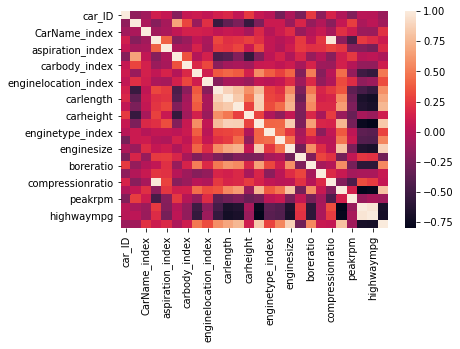

In [1183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr)

In [1184]:
dataset = dataset.select("wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "boreratio", "horsepower", "Price")

In [1185]:
from pyspark.ml.feature import VectorAssembler
featureassembler= VectorAssembler(inputCols=["wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "boreratio", "horsepower"],outputCol="features")
df_vector = featureassembler.transform(dataset).select("features","Price")

In [1186]:
df_vector.show()

+--------------------+---------+
|            features|    Price|
+--------------------+---------+
|[88.6,168.8,64.1,...|  13495.0|
|[88.6,168.8,64.1,...|  16500.0|
|[94.5,171.2,65.5,...|  16500.0|
|[99.8,176.6,66.2,...|  13950.0|
|[99.4,176.6,66.4,...|  17450.0|
|[99.8,177.3,66.3,...|  15250.0|
|[105.8,192.7,71.4...|  17710.0|
|[105.8,192.7,71.4...|  18920.0|
|[105.8,192.7,71.4...|  23875.0|
|[99.5,178.2,67.9,...|17859.167|
|[101.2,176.8,64.8...|  16430.0|
|[101.2,176.8,64.8...|  16925.0|
|[101.2,176.8,64.8...|  20970.0|
|[101.2,176.8,64.8...|  21105.0|
|[103.5,189.0,66.9...|  24565.0|
|[103.5,189.0,66.9...|  30760.0|
|[103.5,193.8,67.9...|  41315.0|
|[110.0,197.0,70.9...|  36880.0|
|[88.4,141.1,60.3,...|   5151.0|
|[94.5,155.9,63.6,...|   6295.0|
+--------------------+---------+
only showing top 20 rows



## split data

In [1187]:
train,test = df_vector.randomSplit([0.7, 0.2])

In [1188]:
train.describe().show()

+-------+-----------------+
|summary|            Price|
+-------+-----------------+
|  count|              161|
|   mean|13063.52898757764|
| stddev|7964.128440756875|
|    min|           5118.0|
|    max|          45400.0|
+-------+-----------------+



In [1189]:
test.describe().show()

+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|                44|
|   mean|14056.761363636364|
| stddev| 8122.857092359258|
|    min|            5572.0|
|    max|           36000.0|
+-------+------------------+



## Model_LinearRegression

In [1190]:
from pyspark.ml.regression import LinearRegression
l= LinearRegression(featuresCol='features',labelCol='Price',maxIter=10, regParam=0.3, elasticNetParam=0.8)
linear_model = l.fit(train)

In [1191]:
print("Coefficients: " + str(linear_model.coefficients))
print("\nIntercept: " + str(linear_model.intercept))

Coefficients: [81.16651677891177,-28.191706906305196,502.2450600427024,1.658435951716976,94.41085050908595,-802.4418735264121,58.66092889899]

Intercept: -42556.404004312084


## Performances

In [1192]:
# on train data
results=linear_model.evaluate(train)
print('Rsquared Error :',results.r2)
trainSummary = linear_model.summary
print("RMSE: %f" % trainSummary.rootMeanSquaredError)

Rsquared Error : 0.8165052196862964
RMSE: 3400.925874


In [1193]:
from  pyspark.sql.functions import abs
predictions = linear_model.transform(test)
x =((predictions['Price']-predictions['prediction'])/predictions['Price'])*100
predictions = predictions.withColumn('Accuracy',abs(x))
predictions.select("prediction","Price","Accuracy","features").show()

+------------------+-------+------------------+--------------------+
|        prediction|  Price|          Accuracy|            features|
+------------------+-------+------------------+--------------------+
| 6067.283166446883| 6795.0|10.709592841105472|[93.1,159.1,64.2,...|
|  5884.71454741928| 7395.0|20.423062239090193|[93.1,166.8,64.2,...|
|6990.1151621873505| 6529.0|7.0625694928373495|[93.7,150.0,64.0,...|
| 7016.650137414814| 7129.0| 1.575955429726276|[93.7,150.0,64.0,...|
|  5941.12545420332| 5572.0| 6.624649213986365|[93.7,157.3,63.8,...|
| 6022.388815837447| 6229.0| 3.316923810604486|[93.7,157.3,63.8,...|
| 6573.919683094784| 6669.0|1.4257057565634432|[93.7,157.3,64.4,...|
|  6867.24820403169| 7609.0|  9.74834795595098|[93.7,167.3,63.8,...|
| 5941.282208797595| 8916.5|33.367552192030566|[94.5,155.9,63.6,...|
| 9615.617140882438|11595.0|  17.0710035283964|[94.5,159.3,64.2,...|
| 6443.519463044846| 7499.0|14.074950486133538|[94.5,165.3,63.8,...|
| 6529.592800220817| 7799.0| 16.27

In [1194]:
# on test data
from pyspark.ml.evaluation import RegressionEvaluator
evaluate_r2 = RegressionEvaluator(predictionCol="prediction",labelCol="Price",metricName="r2")
evaluate_rmse = RegressionEvaluator(predictionCol="prediction",labelCol="Price",metricName="rmse")
print("R Squared on test data = %g" % evaluate_r2.evaluate(predictions))
print("RMSE score on test data = %g" % evaluate_rmse.evaluate(predictions))

R Squared on test data = 0.83012
RMSE score on test data = 3309.69


## Model_Gradient_boosting

In [1195]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Price', maxIter=10)
gbt_model = gbt.fit(train)
gbt_predictions = gbt_model.transform(test)
x =((gbt_predictions['Price']-gbt_predictions['prediction'])/gbt_predictions['Price'])*100
gbt_predictions = gbt_predictions.withColumn('Accuracy',abs(x))
gbt_predictions.select("prediction","Price","Accuracy","features").show()

+------------------+-------+------------------+--------------------+
|        prediction|  Price|          Accuracy|            features|
+------------------+-------+------------------+--------------------+
| 6163.746660073996| 6795.0| 9.289968210831548|[93.1,159.1,64.2,...|
| 6416.136847082292| 7395.0|13.236824244999434|[93.1,166.8,64.2,...|
| 7348.230513945998| 6529.0| 12.54756492488892|[93.7,150.0,64.0,...|
| 7600.620700954293| 7129.0| 6.615523929783886|[93.7,150.0,64.0,...|
| 6163.746660073996| 5572.0|10.620004667516085|[93.7,157.3,63.8,...|
| 6416.136847082292| 6229.0|3.0042839473798644|[93.7,157.3,63.8,...|
| 6362.920664875051| 6669.0| 4.589583672588822|[93.7,157.3,64.4,...|
| 8333.329978600543| 7609.0| 9.519384657649399|[93.7,167.3,63.8,...|
| 6773.810869646716| 8916.5| 24.03060764148807|[94.5,155.9,63.6,...|
|  8589.33654030648|11595.0|25.922065197874254|[94.5,159.3,64.2,...|
| 7199.128364807695| 7499.0| 3.998821645450125|[94.5,165.3,63.8,...|
| 7356.899423044986| 7799.0| 5.668

## Performance

In [1196]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluate_r2 = RegressionEvaluator(predictionCol="prediction",labelCol="Price",metricName="r2")
evaluate_rmse = RegressionEvaluator(predictionCol="prediction",labelCol="Price",metricName="rmse")
print("R Squared on test data = %g" % evaluate_r2.evaluate(gbt_predictions))
print("RMSE score on test data = %g" % evaluate_rmse.evaluate(gbt_predictions))

R Squared on test data = 0.837938
RMSE score on test data = 3232.64


## Model_Random_Forest_Regressor

In [1197]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(featuresCol = 'features', labelCol = 'Price')
rf_model = rf.fit(train)
rf_predictions = rf_model.transform(test)
x =((rf_predictions['Price']-rf_predictions['prediction'])/rf_predictions['Price'])*100
rf_predictions = rf_predictions.withColumn('Accuracy',abs(x))
rf_predictions.select("prediction","Price","Accuracy","features").show()

+------------------+-------+------------------+--------------------+
|        prediction|  Price|          Accuracy|            features|
+------------------+-------+------------------+--------------------+
| 6405.576770548641| 6795.0| 5.731026187657963|[93.1,159.1,64.2,...|
| 6454.001556873427| 7395.0|12.724793010501326|[93.1,166.8,64.2,...|
| 6676.717773472618| 6529.0|2.2624869577671665|[93.7,150.0,64.0,...|
| 6676.717773472618| 7129.0| 6.344259033909127|[93.7,150.0,64.0,...|
| 6405.576770548641| 5572.0|14.960099973952644|[93.7,157.3,63.8,...|
| 6405.576770548641| 6229.0|2.8347530991915466|[93.7,157.3,63.8,...|
| 6777.387213462913| 6669.0|1.6252393681648338|[93.7,157.3,64.4,...|
| 7804.356780061044| 7609.0|  2.56744355448869|[93.7,167.3,63.8,...|
| 6514.658351052933| 8916.5|26.937045353525118|[94.5,155.9,63.6,...|
| 8673.437843647214|11595.0|25.196741322576848|[94.5,159.3,64.2,...|
| 6806.251042139624| 7499.0| 9.237884489403605|[94.5,165.3,63.8,...|
| 7140.578567471476| 7799.0| 8.442

## Performances

In [1198]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluate_r2 = RegressionEvaluator(predictionCol="prediction",labelCol="Price",metricName="r2")
evaluate_rmse = RegressionEvaluator(predictionCol="prediction",labelCol="Price",metricName="rmse")
print("R Squared on test data = %g" % evaluate_r2.evaluate(rf_predictions))
print("RMSE score on test data = %g" % evaluate_rmse.evaluate(rf_predictions))

R Squared on test data = 0.886051
RMSE score on test data = 2710.64


## Model_Decision_Tree_Regressor

In [1199]:
from pyspark.ml.regression import DecisionTreeRegressor
dtr = DecisionTreeRegressor(featuresCol = 'features', labelCol = 'Price')
dtr_model = dtr.fit(train)
dtr_predictions = dtr_model.transform(test)
x =((dtr_predictions['Price']-dtr_predictions['prediction'])/dtr_predictions['Price'])*100
dtr_predictions = dtr_predictions.withColumn('Accuracy',abs(x))
dtr_predictions.select("prediction","Price","Accuracy","features").show()

+------------------+-------+-------------------+--------------------+
|        prediction|  Price|           Accuracy|            features|
+------------------+-------+-------------------+--------------------+
| 6149.882352941177| 6795.0|  9.494005107561787|[93.1,159.1,64.2,...|
| 6149.882352941177| 7395.0| 16.837290697211944|[93.1,166.8,64.2,...|
| 7143.861111111111| 6529.0|  9.417385680978883|[93.7,150.0,64.0,...|
| 7143.861111111111| 7129.0|0.20845996789327134|[93.7,150.0,64.0,...|
| 6149.882352941177| 5572.0| 10.371183649339134|[93.7,157.3,63.8,...|
| 6149.882352941177| 6229.0|  1.270150057133142|[93.7,157.3,63.8,...|
| 6149.882352941177| 6669.0| 7.7840402917802285|[93.7,157.3,64.4,...|
| 8120.291666666667| 7609.0|  6.719564550751307|[93.7,167.3,63.8,...|
| 7143.861111111111| 8916.5| 19.880433902191317|[94.5,155.9,63.6,...|
| 8120.291666666667|11595.0| 29.967299123185278|[94.5,159.3,64.2,...|
| 7143.861111111111| 7499.0|  4.735816627402169|[94.5,165.3,63.8,...|
| 7143.861111111111|

## Performance

In [1200]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluate_r2 = RegressionEvaluator(predictionCol="prediction",labelCol="Price",metricName="r2")
evaluate_rmse = RegressionEvaluator(predictionCol="prediction",labelCol="Price",metricName="rmse")
print("R Squared on test data = %g" % evaluate_r2.evaluate(dtr_predictions))
print("RMSE score on test data = %g" % evaluate_rmse.evaluate(dtr_predictions))

R Squared on test data = 0.851368
RMSE score on test data = 3095.8
